In [ ]:
# Install required libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files

# 데이터 파일 경로
file_path = 'data_number_one.xlsx'

Excel_file = pd.ExcelFile(file_path)

In [ ]:

# Reading and filtering the first sheet '2021_01~06'
sheet_data_2021_01_06 = pd.read_excel(Excel_file, sheet_name='2021_01~06')
filtered_data_2021_01_06 = sheet_data_2021_01_06[sheet_data_2021_01_06['중분류'] == '라면,통조림,상온즉석']

# Display the filtered data for '2021_01~06' sheet
print("Filtered Data for 2021_01~06:")
# Convert Excel serial date numbers to datetime
filtered_data_2021_01_06['판매일'] = pd.to_timedelta(
    filtered_data_2021_01_06['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

display(filtered_data_2021_01_06)  # This will display the DataFrame in Colab
# Show first few rows as a preview of the rest of the data
filtered_data_2021_01_06.head()


Filtered Data for 2021_01~06:


<ipython-input-3-1560ad92b67d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2021_01_06['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
4,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
7,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]너구리얼큰멀티<120g>,식품,"라면,통조림,상온즉석",NaN
8,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
11,2021-01-04,매출,37544,95,1,BX,400*24,24,1.880105e+13,동원꽁치400(24)XXX,식품,"라면,통조림,상온즉석",NaN
12,2021-01-04,매출,37544,95,1,BX,5*8,40,1.880105e+13,오뚜기]진라면<매운/멀티/120g>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166451,2021-06-30,매출,37732,117,3,EA,6入,1,1.701002e+12,육개장 사발 6入 XX,식품,"라면,통조림,상온즉석",NaN
166452,2021-06-30,매출,37732,117,3,EA,6入,1,1.701002e+12,김치사발면 6入 XX,식품,"라면,통조림,상온즉석",NaN
166457,2021-06-30,매출,37732,117,2,EA,67g*6,1,1.701002e+12,새우탕 컵 6入 XX,식품,"라면,통조림,상온즉석",NaN
166471,2021-06-30,매출,38004,141,10,EA,48입,1,8.809398e+12,펭귄]번데기<130g>,식품,"라면,통조림,상온즉석",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
4,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
7,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]너구리얼큰멀티<120g>,식품,"라면,통조림,상온즉석",NaN
8,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
11,2021-01-04,매출,37544,95,1,BX,400*24,24,1.880105e+13,동원꽁치400(24)XXX,식품,"라면,통조림,상온즉석",NaN
12,2021-01-04,매출,37544,95,1,BX,5*8,40,1.880105e+13,오뚜기]진라면<매운/멀티/120g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Now processing the next sheet '2021_07~12'

# Reading and filtering the second sheet
sheet_data_2021_07_12 = pd.read_excel(Excel_file, sheet_name='2021_07~12')
filtered_data_2021_07_12 = sheet_data_2021_07_12[sheet_data_2021_07_12['중분류'] == '라면,통조림,상온즉석']

# Display the filtered data for '2021_01~06' sheet
print("Filtered Data for 2021_07~12:")
# Convert Excel serial date numbers to datetime
filtered_data_2021_07_12['판매일'] = pd.to_timedelta(
    filtered_data_2021_07_12['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

display(filtered_data_2021_07_12)  # This will display the DataFrame in Colab

# Show first few rows as a preview
filtered_data_2021_07_12.head()

Filtered Data for 2021_07~12:


<ipython-input-4-b6644031965a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2021_07_12['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
2,2021-07-01,매출,37650,2205,1,BX,16입,16,1.880107e+13,삼양]불닭까르보큰컵<105g>,식품,"라면,통조림,상온즉석",NaN
3,2021-07-01,매출,37650,2205,1,BX,6입,6,8.801046e+12,오뚜기]컵누들<우동/38.1g>,식품,"라면,통조림,상온즉석",NaN
4,2021-07-01,매출,38132,170,1,BX,12입,12,1.880101e+13,햇반]밥<200g*4>,식품,"라면,통조림,상온즉석",NaN
6,2021-07-01,매출,37902,36,1,BX,16입,16,8.801043e+12,농심]새우탕큰사발<115g>,식품,"라면,통조림,상온즉석",NaN
7,2021-07-01,매출,37902,36,1,BX,16입,16,1.880107e+13,삼양]맛있는라면 종이큰컵<112g>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181679,2021-12-31,매출,38178,113,5,EA,24입,1,8.801047e+12,동원]죽전복<285g>,식품,"라면,통조림,상온즉석",NaN
181681,2021-12-31,매출,38178,113,20,EA,48입,1,8.809398e+12,펭귄]번데기<130g>,식품,"라면,통조림,상온즉석",NaN
181688,2021-12-31,반품,37571,51,1,BX,137*4*8,32,1.701002e+12,농심]사천짜파게티멀티<32>XXX,식품,"라면,통조림,상온즉석",NaN
181692,2021-12-31,반품,37692,33,1,BX,16입,16,8.801043e+12,농심]짜파게티큰사발<123g>,식품,"라면,통조림,상온즉석",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
2,2021-07-01,매출,37650,2205,1,BX,16입,16,1.880107e+13,삼양]불닭까르보큰컵<105g>,식품,"라면,통조림,상온즉석",NaN
3,2021-07-01,매출,37650,2205,1,BX,6입,6,8.801046e+12,오뚜기]컵누들<우동/38.1g>,식품,"라면,통조림,상온즉석",NaN
4,2021-07-01,매출,38132,170,1,BX,12입,12,1.880101e+13,햇반]밥<200g*4>,식품,"라면,통조림,상온즉석",NaN
6,2021-07-01,매출,37902,36,1,BX,16입,16,8.801043e+12,농심]새우탕큰사발<115g>,식품,"라면,통조림,상온즉석",NaN
7,2021-07-01,매출,37902,36,1,BX,16입,16,1.880107e+13,삼양]맛있는라면 종이큰컵<112g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Now processing the next sheet '2022_01~06'

# Reading and filtering the second sheet
sheet_data_2022_01_06 = pd.read_excel(Excel_file, sheet_name='2022_01~06')
filtered_data_2022_01_06 = sheet_data_2022_01_06[sheet_data_2022_01_06['중분류'] == '라면,통조림,상온즉석']

# Display the filtered data for '2022_01~06' sheet
print("Filtered Data for 2022_01~06:")
# Convert Excel serial date numbers to datetime
filtered_data_2022_01_06['판매일'] = pd.to_timedelta(
    filtered_data_2022_01_06['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

display(filtered_data_2022_01_06)  # This will display the DataFrame in Colab

# Show first few rows as a preview
filtered_data_2022_01_06.head()

Filtered Data for 2022_01~06:


<ipython-input-5-4a5a2d253f51>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2022_01_06['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
3,2022-01-03,매출,37806,2267,2,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
4,2022-01-03,매출,37806,2267,2,BX,24입,24,1.880105e+13,오뚜기]국수 소면<500g>,식품,"라면,통조림,상온즉석",NaN
5,2022-01-03,매출,37806,2267,2,BX,15입,15,1.880105e+13,오뚜기]국수 소면<900g>,식품,"라면,통조림,상온즉석",NaN
10,2022-01-03,매출,37700,25,4,BX,30입,30,8.801043e+12,농심]신라면컵<65g>,식품,"라면,통조림,상온즉석",NaN
11,2022-01-03,매출,37700,25,4,BX,16입,16,8.801043e+12,농심]신라면큰사발<114g>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172068,2022-06-30,매출,37742,49,10,EA,24입,1,8.801045e+12,오뚜기]3분백세순한맛<200g>,식품,"라면,통조림,상온즉석",NaN
172069,2022-06-30,매출,37742,49,10,EA,24입,1,8.801045e+12,오뚜기]3분백세약간매운맛<200g>,식품,"라면,통조림,상온즉석",NaN
172070,2022-06-30,매출,37742,49,10,EA,24입,1,8.801045e+12,오뚜기]3분햄버그<140g>,식품,"라면,통조림,상온즉석",NaN
172080,2022-06-30,매출,37746,145,1,EA,6入,1,1.701002e+12,김치사발면 6入 XX,식품,"라면,통조림,상온즉석",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
3,2022-01-03,매출,37806,2267,2,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
4,2022-01-03,매출,37806,2267,2,BX,24입,24,1.880105e+13,오뚜기]국수 소면<500g>,식품,"라면,통조림,상온즉석",NaN
5,2022-01-03,매출,37806,2267,2,BX,15입,15,1.880105e+13,오뚜기]국수 소면<900g>,식품,"라면,통조림,상온즉석",NaN
10,2022-01-03,매출,37700,25,4,BX,30입,30,8.801043e+12,농심]신라면컵<65g>,식품,"라면,통조림,상온즉석",NaN
11,2022-01-03,매출,37700,25,4,BX,16입,16,8.801043e+12,농심]신라면큰사발<114g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Now processing the next sheet '2022_07_12'

# Reading and filtering the second sheet
sheet_data_2022_07_12 = pd.read_excel(Excel_file, sheet_name='2022_07~12')
filtered_data_2022_07_12 = sheet_data_2022_07_12[sheet_data_2022_07_12['중분류'] == '라면,통조림,상온즉석']

# Display the filtered data for '2022_07_12' sheet
print("Filtered Data for 2022_07~12:")
filtered_data_2022_07_12['판매일'] = pd.to_timedelta(
    filtered_data_2022_07_12['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')
display(filtered_data_2022_07_12)  # This will display the DataFrame in Colab

# Show first few rows as a preview
filtered_data_2022_07_12.head()

Filtered Data for 2022_07~12:


<ipython-input-6-794ba55723d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2022_07_12['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
4,2022-07-01,매출,37501,80,2,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
7,2022-07-01,매출,37501,80,3,BX,6입,6,8.801046e+12,오뚜기]진라면<순한/작은컵/65g>,식품,"라면,통조림,상온즉석",NaN
11,2022-07-01,매출,37538,2040,4,BX,12입,12,1.880105e+13,오뚜기]참깨라면<큰컵/110g>,식품,"라면,통조림,상온즉석",NaN
12,2022-07-01,매출,37538,2040,6,BX,6입,6,8.801043e+12,농심]신라면블랙사발<6入>,식품,"라면,통조림,상온즉석",NaN
14,2022-07-01,매출,37539,23,1,BX,16입,16,8.801043e+12,농심]새우탕큰사발<115g>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178137,2022-12-30,매출,38004,2213,4,EA,18입,1,8.801007e+12,햇반컵밥]황태국밥<170g>,식품,"라면,통조림,상온즉석",NaN
178143,2022-12-30,매출,37739,2249,16,EA,16입,1,8.801046e+12,오뚜기]옛날구수한누룽지<60g>,식품,"라면,통조림,상온즉석",NaN
178144,2022-12-30,매출,37902,2090,1,EA,1CS,1,8.801077e+12,소세지]천하장사<100입>,식품,"라면,통조림,상온즉석",NaN
178155,2022-12-30,매출,38004,2213,5,EA,30입,1,8.801045e+12,오뚜기]옛날당면<300g>,식품,"라면,통조림,상온즉석",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
4,2022-07-01,매출,37501,80,2,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
7,2022-07-01,매출,37501,80,3,BX,6입,6,8.801046e+12,오뚜기]진라면<순한/작은컵/65g>,식품,"라면,통조림,상온즉석",NaN
11,2022-07-01,매출,37538,2040,4,BX,12입,12,1.880105e+13,오뚜기]참깨라면<큰컵/110g>,식품,"라면,통조림,상온즉석",NaN
12,2022-07-01,매출,37538,2040,6,BX,6입,6,8.801043e+12,농심]신라면블랙사발<6入>,식품,"라면,통조림,상온즉석",NaN
14,2022-07-01,매출,37539,23,1,BX,16입,16,8.801043e+12,농심]새우탕큰사발<115g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Now processing the next sheet '2023_01~06'

# Reading and filtering the second sheet
sheet_data_2023_01_06 = pd.read_excel(Excel_file, sheet_name='2023_01~06')
filtered_data_2023_01_06 = sheet_data_2023_01_06[sheet_data_2023_01_06['중분류'] == '라면,통조림,상온즉석']

# Display the filtered data for '2022_07_12' sheet
print("Filtered Data for 2023_01_06:")
filtered_data_2023_01_06['판매일'] = pd.to_timedelta(
    filtered_data_2023_01_06['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')
display(filtered_data_2023_01_06)  # This will display the DataFrame in Colab

# Show first few rows as a preview
filtered_data_2023_01_06.head()

Filtered Data for 2023_01_06:


<ipython-input-7-b709407bc840>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023_01_06['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2023-01-02,매출,37788,75,3,BX,40입,40,8801043015028,농심]너구리얼큰멀티<120g>,식품,"라면,통조림,상온즉석",NaN
2,2023-01-02,매출,37811,172,1,BX,12입,12,18801045571949,오뚜기]열라면<큰컵/105g>,식품,"라면,통조림,상온즉석",NaN
9,2023-01-02,매출,37810,24,1,BX,18입,18,18801128505793,팔도]왕뚜껑<110g>,식품,"라면,통조림,상온즉석",NaN
12,2023-01-02,매출,37810,24,1,BX,40입,40,8801043015271,농심]짜파게티멀티<140g>,식품,"라면,통조림,상온즉석",NaN
13,2023-01-02,매출,37810,24,1,BX,40입,40,8801043014793,농심]안성탕면멀티<125g>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164397,2023-06-30,매출,37741,6,5,EA,1입,1,8801045331126,오뚜기]쨈딸기<300g>,식품,"라면,통조림,상온즉석",NaN
164403,2023-06-30,매출,38178,113,10,EA,24입,1,8801045363479,오뚜기]스위트콘<340g>,식품,"라면,통조림,상온즉석",NaN
164417,2023-06-30,매출,37708,2054,2,EA,24입,1,8809294010601,펭귄]고등어<400g>,식품,"라면,통조림,상온즉석",NaN
164433,2023-06-30,반품,37791,2044,17,EA,18입,1,8801045299419,오뚜기]파우치 옛날사골곰탕<350g>,식품,"라면,통조림,상온즉석",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2023-01-02,매출,37788,75,3,BX,40입,40,8801043015028,농심]너구리얼큰멀티<120g>,식품,"라면,통조림,상온즉석",NaN
2,2023-01-02,매출,37811,172,1,BX,12입,12,18801045571949,오뚜기]열라면<큰컵/105g>,식품,"라면,통조림,상온즉석",NaN
9,2023-01-02,매출,37810,24,1,BX,18입,18,18801128505793,팔도]왕뚜껑<110g>,식품,"라면,통조림,상온즉석",NaN
12,2023-01-02,매출,37810,24,1,BX,40입,40,8801043015271,농심]짜파게티멀티<140g>,식품,"라면,통조림,상온즉석",NaN
13,2023-01-02,매출,37810,24,1,BX,40입,40,8801043014793,농심]안성탕면멀티<125g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Now processing the next sheet '2023_07~12'

# Reading and filtering the second sheet
sheet_data_2023_07_12 = pd.read_excel(Excel_file, sheet_name='2023_07~12')
filtered_data_2023_07_12 = sheet_data_2023_07_12[sheet_data_2023_07_12['중분류'] == '라면,통조림,상온즉석']

# Display the filtered data for '2022_07_12' sheet
print("Filtered Data for 2023_07_12:")
filtered_data_2023_07_12['판매일'] = pd.to_timedelta(
    filtered_data_2023_07_12['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')
display(filtered_data_2023_07_12)  # This will display the DataFrame in Colab

# Show first few rows as a preview
filtered_data_2023_07_12.head()

Filtered Data for 2023_07_12:


<ipython-input-8-7243fb2f4f4f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023_07_12['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
17,2023-07-03,매출,37542,8,1,BX,6입,6,8.801046e+12,오뚜기]진짬뽕<작은컵/75g>,식품,"라면,통조림,상온즉석",NaN
18,2023-07-03,매출,37542,8,1,BX,5*8,40,1.880105e+13,오뚜기]진라면<순한/멀티/120g>,식품,"라면,통조림,상온즉석",NaN
19,2023-07-03,매출,37542,8,1,BX,16입,16,8.801043e+12,농심]새우탕큰사발<115g>,식품,"라면,통조림,상온즉석",NaN
20,2023-07-03,매출,37542,8,1,BX,12입,12,8.801043e+12,농심]생생우동용기<276g>,식품,"라면,통조림,상온즉석",NaN
21,2023-07-03,매출,37542,8,1,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171498,2023-12-29,매출,37692,33,3,EA,12입,1,8.801045e+12,오뚜기]마열<큰컵>,식품,"라면,통조림,상온즉석",NaN
171507,2023-12-29,매출,37692,33,3,EA,18입,1,8.801045e+12,오뚜기]파우치 옛날육개장<500g>,식품,"라면,통조림,상온즉석",NaN
171513,2023-12-29,매출,37772,2207,2,EA,16입,1,8.801129e+12,팔도]해물왕컵<110g>,식품,"라면,통조림,상온즉석",NaN
171519,2023-12-29,반품,37741,12,4,CS,8입,6,8.801007e+12,제당]스팸클래식<200g*6>,식품,"라면,통조림,상온즉석",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
17,2023-07-03,매출,37542,8,1,BX,6입,6,8.801046e+12,오뚜기]진짬뽕<작은컵/75g>,식품,"라면,통조림,상온즉석",NaN
18,2023-07-03,매출,37542,8,1,BX,5*8,40,1.880105e+13,오뚜기]진라면<순한/멀티/120g>,식품,"라면,통조림,상온즉석",NaN
19,2023-07-03,매출,37542,8,1,BX,16입,16,8.801043e+12,농심]새우탕큰사발<115g>,식품,"라면,통조림,상온즉석",NaN
20,2023-07-03,매출,37542,8,1,BX,12입,12,8.801043e+12,농심]생생우동용기<276g>,식품,"라면,통조림,상온즉석",NaN
21,2023-07-03,매출,37542,8,1,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
dataframes = [
    filtered_data_2021_01_06,
    filtered_data_2021_07_12,
    filtered_data_2022_01_06,
    filtered_data_2022_07_12,
    filtered_data_2023_01_06,
    filtered_data_2023_07_12
]

combined_data = pd.concat(dataframes, ignore_index=True)

# Display the combined data
print("Combined Data:")
display(combined_data)

# Show the first few rows of the combined data
combined_data.head()

Combined Data:


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
1,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]너구리얼큰멀티<120g>,식품,"라면,통조림,상온즉석",NaN
2,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
3,2021-01-04,매출,37544,95,1,BX,400*24,24,1.880105e+13,동원꽁치400(24)XXX,식품,"라면,통조림,상온즉석",NaN
4,2021-01-04,매출,37544,95,1,BX,5*8,40,1.880105e+13,오뚜기]진라면<매운/멀티/120g>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207198,2023-12-29,매출,37692,33,3,EA,12입,1,8.801045e+12,오뚜기]마열<큰컵>,식품,"라면,통조림,상온즉석",NaN
207199,2023-12-29,매출,37692,33,3,EA,18입,1,8.801045e+12,오뚜기]파우치 옛날육개장<500g>,식품,"라면,통조림,상온즉석",NaN
207200,2023-12-29,매출,37772,2207,2,EA,16입,1,8.801129e+12,팔도]해물왕컵<110g>,식품,"라면,통조림,상온즉석",NaN
207201,2023-12-29,반품,37741,12,4,CS,8입,6,8.801007e+12,제당]스팸클래식<200g*6>,식품,"라면,통조림,상온즉석",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
1,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]너구리얼큰멀티<120g>,식품,"라면,통조림,상온즉석",NaN
2,2021-01-04,매출,37544,95,1,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
3,2021-01-04,매출,37544,95,1,BX,400*24,24,1.880105e+13,동원꽁치400(24)XXX,식품,"라면,통조림,상온즉석",NaN
4,2021-01-04,매출,37544,95,1,BX,5*8,40,1.880105e+13,오뚜기]진라면<매운/멀티/120g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
print(combined_data['판매일'].min(), combined_data['판매일'].max())
print(filtered_data_2021_01_06['판매일'].min(), filtered_data_2021_01_06['판매일'].max())

2021-01-04 00:00:00 2023-12-29 00:00:00
2021-01-04 00:00:00 2021-06-30 00:00:00


In [ ]:
print(pd.read_excel(Excel_file, sheet_name = '2021_01~06'))
#

          판매일  구분   우편번호  매출처코드  판매수량 옵션코드    규격  입수  상품 바코드(대한상의)  \
0       44200  매출  37684     98     1   BX    3입   1  1.701008e+12   
1       44200  매출  37544     95     1   BX    1입   4  1.880104e+13   
2       44200  매출  37542      8     2   BX   12입  12  1.880104e+13   
3       44200  매출  37542      8     1   BX  3팩*8   1  1.880475e+13   
4       44200  매출  37542      8     3   BX    6입   6  8.801043e+12   
...       ...  ..    ...    ...   ...  ...   ...  ..           ...   
166514  44377  반품  37650     62     6   BX   30입  30  1.880104e+13   
166515  44377  반품  37831     46     3   CS   24입   6  8.801129e+12   
166516  44377  반품  37706    121     2   EA    1입   1  8.809303e+12   
166517  44377  반품  37733     13     2   EA   24입   1  1.701006e+12   
166518  44377  반품  37902     36    30   EA   30입   1  8.801057e+12   

                          상품명  대분류          중분류     소분류  
0         화장지 잘풀리는집 2겹<30롤*3>  비식품         화장지류     NaN  
1            맥심모카 210T<*4>XXX   식품        커

In [ ]:
combined_data = pd.read_excel('combined_data.xlsx')

라면만 구매했을 때의 판매수량

<ipython-input-12-621f78a754f0>:24: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight')  # Save as PNG
<ipython-input-12-621f78a754f0>:24: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight')  # Save as PNG
<ipython-input-12-621f78a754f0>:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight')  # Save as PNG
<ipython-input-12-621f78a754f0>:24: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight')  # Save as PNG
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-

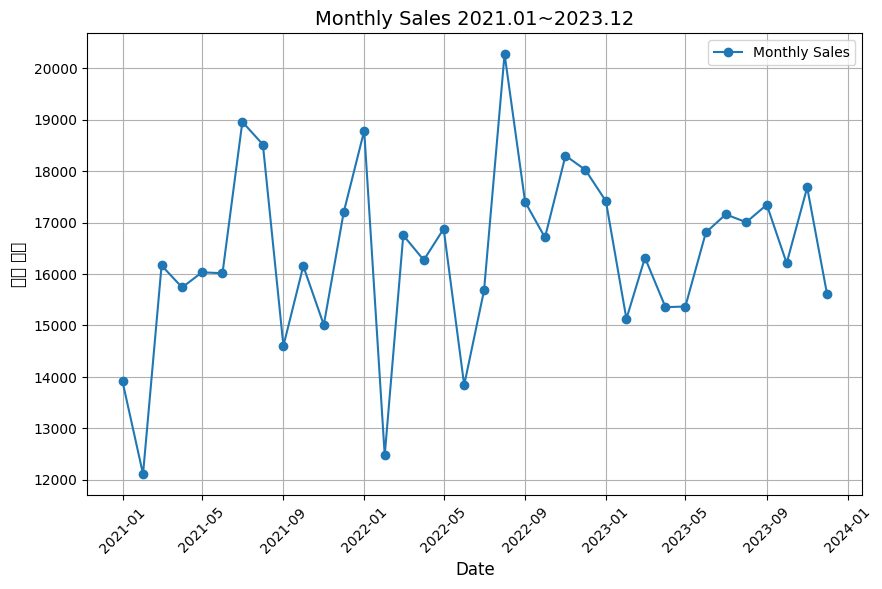

In [ ]:

# Ensure that '판매일' is in datetime format
combined_data['판매일'] = pd.to_timedelta(
    combined_data['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

# Aggregate '판매 수량' by month
combined_data['YearMonth'] = combined_data['판매일'].dt.to_period('M')
monthly_sales = combined_data.groupby('YearMonth')['판매수량'].sum().reset_index()

# Convert 'YearMonth' back to a timestamp for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Plot the time series for '판매 수량'
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['판매수량'], marker='o', linestyle='-', label='Monthly Sales')
plt.title('Monthly Sales 2021.01~2023.12', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('판매 수량', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Save the plot as an image file
plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()


In [ ]:

# Ensure '판매일' is in datetime format
combined_data['판매일'] = pd.to_datetime(combined_data['판매일'])

# Check if '구분' is either '매출' or '반품'
print(combined_data['구분'].unique())  # This will show if there are only '매출' and '반품'

# Group by '판매일' and '구분' (매출, 반품), and sum the '판매수량'
grouped_data = combined_data.groupby(['판매일', '구분'])['판매수량'].sum().unstack(fill_value=0)

# If '반품' is missing in some rows, make sure it is handled as zero
grouped_data['반품'] = grouped_data.get('반품', 0)

# Calculate net sales by subtracting '반품' from '매출'
grouped_data['net_sales'] = grouped_data['매출'] - grouped_data['반품']

# Reset the index to get '판매일' back as a column for visualization
grouped_data = grouped_data.reset_index()

# Display the data with net sales
print("Data with Net Sales (매출 - 반품):")
grouped_data.head()


['매출' '반품']
Data with Net Sales (매출 - 반품):


구분,판매일,매출,반품,net_sales
0,2021-01-04,1035,4,1031
1,2021-01-05,653,0,653
2,2021-01-06,624,6,618
3,2021-01-07,304,1,303
4,2021-01-08,623,1,622


매출-반품 고려한 라면,통조림,상온즉석 식품 그래프 시각화

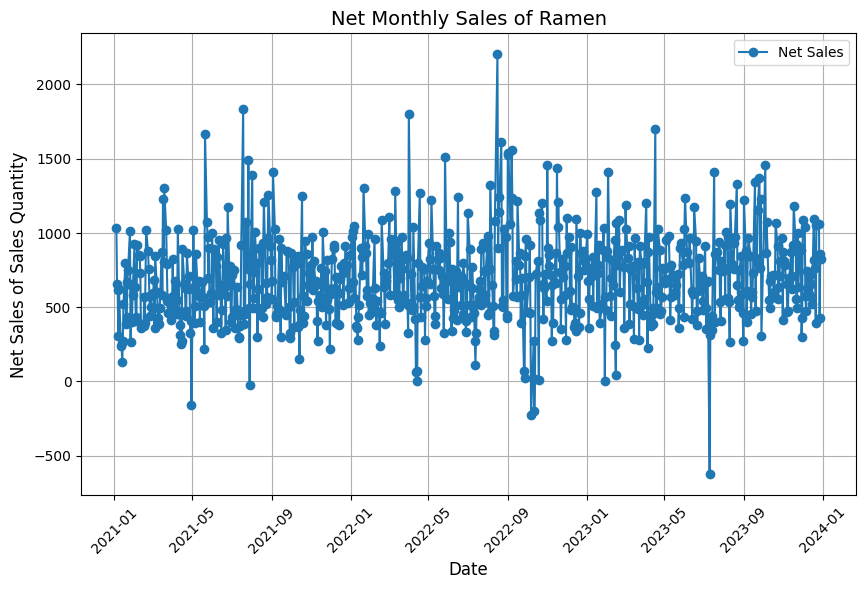

In [ ]:

# Plot the net sales over time
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['판매일'], grouped_data['net_sales'], marker='o', linestyle='-', label='Net Sales')
plt.title('Net Monthly Sales of Ramen', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Net Sales of Sales Quantity', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Save the plot if needed
plt.savefig('net_sales_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


원본 데이터인 data_number_one 파일에서 라면뿐만 아니라 음료,생수,건강 식품과 신선식품을 추출해 라면 구매에 영향이 있는지 서로 연관성을 지니는지 확인하기 위해 아래와 같이 음료,생수,건강 그리고 신선식품 데이터 추출.

In [ ]:

# Reading the sheet '2021_01~06'
sheet_data_2021 = pd.read_excel(Excel_file, sheet_name='2021_01~06')

# Define the list of categories you want to include
categories = ['라면,통조림,상온즉석', '생수,음료,건강', '과자,씨리얼,초코릿,빵류', '화장지류' ]

# Filter the data to include rows where '중분류' is in the list of categories
filtered_data_2021= sheet_data_2021[
    sheet_data_2021['중분류'].isin(categories)
]

# Convert '판매일' to datetime
filtered_data_2021['판매일'] = pd.to_timedelta(
    filtered_data_2021['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

# Display the filtered data
print("Filtered Data for 2021_01~06:")
display(filtered_data_2021.head())


Filtered Data for 2021_01~06:


<ipython-input-15-73d5f78426ad>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2021['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04,매출,37684,98,1,BX,3입,1,1.701008e+12,화장지 잘풀리는집 2겹<30롤*3>,비식품,화장지류,NaN
3,2021-01-04,매출,37542,8,1,BX,3팩*8,1,1.880475e+13,모나리자]콤비280매,비식품,화장지류,NaN
4,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
5,2021-01-04,매출,37542,8,1,BX,24입,24,2.818830e+12,롯데]칠성사이다(병) <340ml>,식품,"생수,음료,건강",NaN
6,2021-01-04,매출,37542,8,1,BX,12입,12,1.880110e+13,오츠카]포카리<1.5L>,식품,"생수,음료,건강",NaN


In [ ]:
# Reading the sheet '2021_07~12'
sheet_data_2021_12 = pd.read_excel(Excel_file, sheet_name='2021_07~12')

# Define the list of categories you want to include
categories = ['라면,통조림,상온즉석', '생수,음료,건강', '과자,씨리얼,초코릿,빵류', '화장지류' ]

# Filter the data to include rows where '중분류' is in the list of categories
filtered_data_2021_12= sheet_data_2021_12[
    sheet_data_2021_12['중분류'].isin(categories)
]

# Convert '판매일' to datetime
filtered_data_2021_12['판매일'] = pd.to_timedelta(
    filtered_data_2021_12['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

# Display the filtered data
print("Filtered Data for 2021_07~12:")
display(filtered_data_2021_12.head())

Filtered Data for 2021_07~12:


<ipython-input-16-bb5b1b9bf34b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2021_12['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-07-01,매출,37501,2129,2,BX,24입,24,1.880113e+13,팔도]뽀로로딸기<235ml*24>,식품,"생수,음료,건강",NaN
1,2021-07-01,매출,37650,2205,1,BX,20입,20,8.801043e+12,농심]벌집핏자<90g>,식품,"과자,씨리얼,초코릿,빵류",NaN
2,2021-07-01,매출,37650,2205,1,BX,16입,16,1.880107e+13,삼양]불닭까르보큰컵<105g>,식품,"라면,통조림,상온즉석",NaN
3,2021-07-01,매출,37650,2205,1,BX,6입,6,8.801046e+12,오뚜기]컵누들<우동/38.1g>,식품,"라면,통조림,상온즉석",NaN
4,2021-07-01,매출,38132,170,1,BX,12입,12,1.880101e+13,햇반]밥<200g*4>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Reading the sheet '2022_01~06'
sheet_data_2022 = pd.read_excel(Excel_file, sheet_name='2022_01~06')

# Define the list of categories you want to include
categories = ['라면,통조림,상온즉석', '생수,음료,건강', '과자,씨리얼,초코릿,빵류', '화장지류' ]

# Filter the data to include rows where '중분류' is in the list of categories
filtered_data_2022= sheet_data_2022[
    sheet_data_2022['중분류'].isin(categories)
]

# Convert '판매일' to datetime
filtered_data_2022['판매일'] = pd.to_timedelta(
    filtered_data_2022['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

# Display the filtered data
print("Filtered Data for 2022_01~06:")
display(filtered_data_2022.head())

Filtered Data for 2022_01~06:


<ipython-input-17-b30f4fb17328>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2022['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2022-01-03,매출,37542,8,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,식품,"생수,음료,건강",NaN
1,2022-01-03,매출,37806,2267,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,식품,"생수,음료,건강",NaN
2,2022-01-03,매출,37806,2267,2,BX,12입,12,1.880138e+13,웅진]초록매실<1.5>,식품,"생수,음료,건강",NaN
3,2022-01-03,매출,37806,2267,2,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN
4,2022-01-03,매출,37806,2267,2,BX,24입,24,1.880105e+13,오뚜기]국수 소면<500g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Reading the sheet '2022_07~12'
sheet_data_2022_12 = pd.read_excel(Excel_file, sheet_name='2022_07~12')

# Define the list of categories you want to include
categories = ['라면,통조림,상온즉석', '생수,음료,건강', '과자,씨리얼,초코릿,빵류', '화장지류' ]

# Filter the data to include rows where '중분류' is in the list of categories
filtered_data_2022_12= sheet_data_2022_12[
    sheet_data_2022_12['중분류'].isin(categories)
]

# Convert '판매일' to datetime
filtered_data_2022_12['판매일'] = pd.to_timedelta(
    filtered_data_2022_12['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

# Display the filtered data
print("Filtered Data for 2022_07~12:")
display(filtered_data_2022_12.head())

Filtered Data for 2022_07~12:


<ipython-input-18-a5d3f04a3f83>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2022_12['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2022-07-01,매출,37501,80,1,BX,12입,12,3.880106e+13,롯데]꼬깔콘고소한<112g>,식품,"과자,씨리얼,초코릿,빵류",NaN
1,2022-07-01,매출,37501,80,1,BX,12입,12,1.880112e+13,오리온]포카칩어니언L<110g>,식품,"과자,씨리얼,초코릿,빵류",NaN
2,2022-07-01,매출,37501,80,1,BX,12입,12,1.880110e+13,오츠카]포카리<1.5L>,식품,"생수,음료,건강",NaN
3,2022-07-01,매출,37501,80,1,BX,12입,12,1.880111e+13,크라운]콘칩대<148g>XXX,식품,"과자,씨리얼,초코릿,빵류",NaN
4,2022-07-01,매출,37501,80,2,BX,40입,40,8.801043e+12,농심]신라면멀티<120g>,식품,"라면,통조림,상온즉석",NaN


In [ ]:
# Reading the sheet '2023_01~06'
sheet_data_2023 = pd.read_excel(Excel_file, sheet_name='2023_01~06')

# Define the list of categories you want to include
categories = ['라면,통조림,상온즉석', '생수,음료,건강', '과자,씨리얼,초코릿,빵류', '화장지류' ]

# Filter the data to include rows where '중분류' is in the list of categories
filtered_data_2023= sheet_data_2023[
    sheet_data_2023['중분류'].isin(categories)
]

# Convert '판매일' to datetime
filtered_data_2023['판매일'] = pd.to_timedelta(
    filtered_data_2023['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

# Display the filtered data
print("Filtered Data for 2023_01~06:")
display(filtered_data_2023.head())

Filtered Data for 2023_01~06:


<ipython-input-19-e0ae43d898f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2023-01-02,매출,37788,75,3,BX,40입,40,8801043015028,농심]너구리얼큰멀티<120g>,식품,"라면,통조림,상온즉석",NaN
1,2023-01-02,매출,37788,75,3,BX,8입,8,8801043037228,농심]인기스낵기획팩<260g>,식품,"과자,씨리얼,초코릿,빵류",NaN
2,2023-01-02,매출,37811,172,1,BX,12입,12,18801045571949,오뚜기]열라면<큰컵/105g>,식품,"라면,통조림,상온즉석",NaN
3,2023-01-02,매출,37811,172,1,BX,24입,24,18801382145940,웅진]초록매실<500>,식품,"생수,음료,건강",NaN
4,2023-01-02,매출,37810,24,2,BX,240ml*30,30,1701006130843,조지아캔 오리지널<240ml*30>,식품,"생수,음료,건강",NaN


In [ ]:
# Reading the sheet '2023_07~12'
sheet_data_2023_12 = pd.read_excel(Excel_file, sheet_name='2023_07~12')

# Define the list of categories you want to include
categories = ['라면,통조림,상온즉석', '생수,음료,건강', '과자,씨리얼,초코릿,빵류', '화장지류' ]

# Filter the data to include rows where '중분류' is in the list of categories
filtered_data_2023_12= sheet_data_2023_12[
    sheet_data_2023_12['중분류'].isin(categories)
]

# Convert '판매일' to datetime
filtered_data_2023_12['판매일'] = pd.to_timedelta(
    filtered_data_2023_12['판매일'], unit='D'
) + pd.Timestamp('1899-12-30')

# Display the filtered data
print("Filtered Data for 2023_07~12:")
display(filtered_data_2023_12.head())

Filtered Data for 2023_07~12:


<ipython-input-20-c44e9a7a0965>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2023_12['판매일'] = pd.to_timedelta(


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2023-07-03,매출,37692,33,1,BX,24입,24,1.880105e+13,오뚜기]뿌셔<불고기/90g>,식품,"과자,씨리얼,초코릿,빵류",NaN
2,2023-07-03,매출,37542,8,1,BX,20입,20,1.880104e+13,동서]맥심티오피마스터라떼 <275ml>,식품,"생수,음료,건강",NaN
3,2023-07-03,매출,37542,8,1,BX,6입,6,2.880106e+13,롯데]목캔디봉허브<217g>,식품,"과자,씨리얼,초코릿,빵류",NaN
4,2023-07-03,매출,37517,215,1,BX,3입,3,8.809382e+12,헬로]에코베어3겹<30롤>,비식품,화장지류,NaN
7,2023-07-03,매출,37517,215,1,BX,30입,30,6.880106e+13,롯데]칠성사이다캔<250ml>,식품,"생수,음료,건강",NaN


In [ ]:
dataframes = [
    filtered_data_2021,
    filtered_data_2021_12,
    filtered_data_2022,
    filtered_data_2022_12,
    filtered_data_2023,
    filtered_data_2023_12
]

combined_data_many_catgories = pd.concat(dataframes, ignore_index=True)

# Display the combined data
print("combined_data_many_catgories:")
display(combined_data_many_catgories)

combined_data_many_catgories.to_excel('combined_data_many_categories.xlsx', index=False)

# Show the first few rows of the combined data
combined_data_many_catgories.head()

combined_data_many_catgories:


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04,매출,37684,98,1,BX,3입,1,1.701008e+12,화장지 잘풀리는집 2겹<30롤*3>,비식품,화장지류,NaN
1,2021-01-04,매출,37542,8,1,BX,3팩*8,1,1.880475e+13,모나리자]콤비280매,비식품,화장지류,NaN
2,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
3,2021-01-04,매출,37542,8,1,BX,24입,24,2.818830e+12,롯데]칠성사이다(병) <340ml>,식품,"생수,음료,건강",NaN
4,2021-01-04,매출,37542,8,1,BX,12입,12,1.880110e+13,오츠카]포카리<1.5L>,식품,"생수,음료,건강",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580319,2023-12-29,반품,37930,222,1,BX,12입,12,1.880112e+13,오리온]스윙칩볶음고추장L<110g>,식품,"과자,씨리얼,초코릿,빵류",NaN
580320,2023-12-29,반품,37930,222,1,BX,20입,20,2.880112e+13,오리온]오징어땅콩L<180g>,식품,"과자,씨리얼,초코릿,빵류",NaN
580321,2023-12-29,반품,37741,12,4,CS,8입,6,8.801007e+12,제당]스팸클래식<200g*6>,식품,"라면,통조림,상온즉석",NaN
580322,2023-12-29,반품,37886,104,5,CS,6입,6,8.809274e+12,가야산천년수<2L>,식품,"생수,음료,건강",NaN


,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04,매출,37684,98,1,BX,3입,1,1.701008e+12,화장지 잘풀리는집 2겹<30롤*3>,비식품,화장지류,NaN
1,2021-01-04,매출,37542,8,1,BX,3팩*8,1,1.880475e+13,모나리자]콤비280매,비식품,화장지류,NaN
2,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
3,2021-01-04,매출,37542,8,1,BX,24입,24,2.818830e+12,롯데]칠성사이다(병) <340ml>,식품,"생수,음료,건강",NaN
4,2021-01-04,매출,37542,8,1,BX,12입,12,1.880110e+13,오츠카]포카리<1.5L>,식품,"생수,음료,건강",NaN


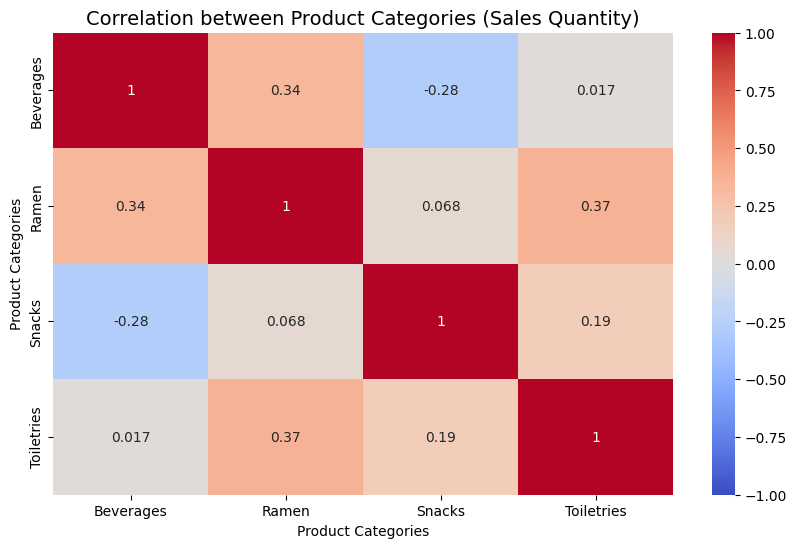

In [ ]:

# 1. Load and Prepare Data

# Assuming 'combined_data_many_categories' is already defined and contains your sales data.
# If not, you need to load your data into this DataFrame.

# Categories to filter
categories = ['라면,통조림,상온즉석', '생수,음료,건강', '과자,씨리얼,초코릿,빵류', '화장지류']

# Filter data for the specified categories
filtered_data = combined_data_many_catgories[combined_data_many_catgories['중분류'].isin(categories)].copy()

# Rename categories if necessary
category_rename_map = {
    '라면,통조림,상온즉석': 'Ramen', '생수,음료,건강': 'Beverages',
    '과자,씨리얼,초코릿,빵류': 'Snacks', '화장지류': 'Toiletries'
    # Add other renaming mappings if needed
}
filtered_data['중분류'] = filtered_data['중분류'].replace(category_rename_map)

# 2. Data Type Conversion

# Convert '판매일' to datetime
filtered_data['판매일'] = pd.to_datetime(filtered_data['판매일'], errors='coerce')

# Drop rows with invalid '판매일'
filtered_data = filtered_data.dropna(subset=['판매일'])

# Convert '판매수량' to numeric
filtered_data['판매수량'] = pd.to_numeric(filtered_data['판매수량'], errors='coerce')

# Handle any NaN in '판매수량'
filtered_data = filtered_data.dropna(subset=['판매수량'])

# 3. Aggregate Monthly Sales

# Create 'YearMonth' column
filtered_data['YearMonth'] = filtered_data['판매일'].dt.to_period('M')

# Group by 'YearMonth' and '중분류', summing '판매수량'
monthly_sales = filtered_data.groupby(['YearMonth', '중분류'])['판매수량'].sum().unstack().fillna(0)

# 4. Calculate Correlation Matrix

correlation_matrix = monthly_sales.corr()

# 5. Visualize Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel('Product Categories')
plt.ylabel('Product Categories')
plt.title('Correlation between Product Categories (Sales Quantity)', fontsize=14)

plt.savefig('product_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


Auto ARIMA

In [ ]:
!pip install pmdarima

<ipython-input-40-1eb7b563567c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'YearMonth'] = filtered_data['판매일'].dt.to_period('M')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=654.674, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=803.162, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=665.482, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=653.410, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=651.893, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=653.559, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=645.069, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=642.605, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=641.106, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=642.736, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.923 seconds


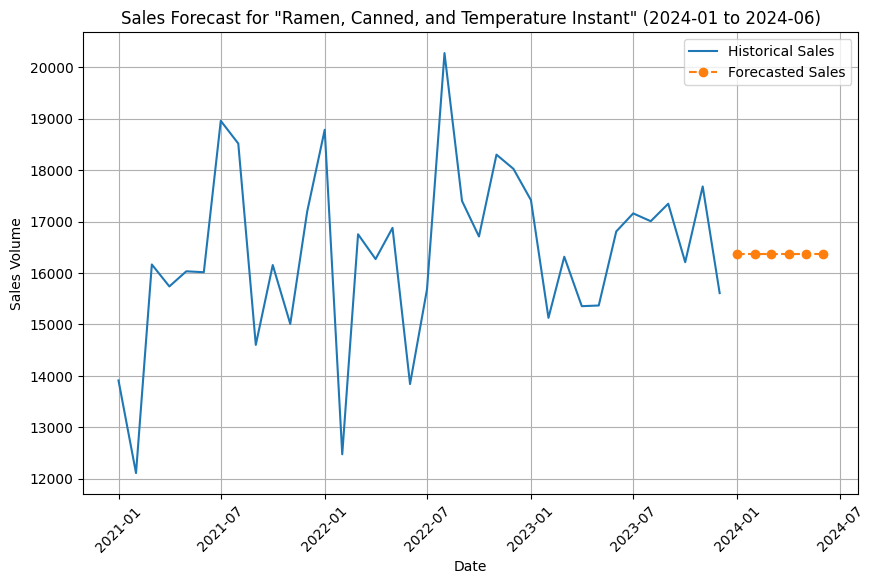

,Predicted Sales
2024-01-01,16367.194444
2024-02-01,16367.194444
2024-03-01,16367.194444
2024-04-01,16367.194444
2024-05-01,16367.194444
2024-06-01,16367.194444


In [ ]:
#Auto ARIMA
from pmdarima import auto_arima

# Ensure '판매일' is in datetime format
combined_data_many_catgories['판매일'] = pd.to_datetime(combined_data_many_catgories['판매일'])

# Filter the data for 'Ramen, Canned, and Temperature Instant' category
filtered_data = combined_data_many_catgories[combined_data_many_catgories['중분류'] == '라면,통조림,상온즉석']

# Aggregate sales by month
filtered_data.loc[:, 'YearMonth'] = filtered_data['판매일'].dt.to_period('M')
monthly_sales = filtered_data.groupby('YearMonth')['판매수량'].sum().reset_index()

# Convert 'YearMonth' back to datetime and set frequency
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['YearMonth'].dt.to_timestamp())
sales_ts = monthly_sales.set_index('YearMonth')['판매수량']
sales_ts.index = pd.DatetimeIndex(sales_ts.index, freq='MS')

# Use auto_arima to find the best (p, d, q) parameters
auto_model = auto_arima(sales_ts, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model
auto_model_fit = auto_model.fit(sales_ts)

# Forecast sales for the next 6 months (January to June 2024)
forecast_auto = auto_model_fit.predict(n_periods=6)

# Create a new dataframe for the forecasted values
forecast_index = pd.date_range(start='2024-01-01', periods=6, freq='MS')
forecast_auto_df_arima = pd.DataFrame(forecast_auto, index=forecast_index, columns=['Predicted Sales'])

# Plot the historical data and forecast
plt.figure(figsize=(10,6))
plt.plot(sales_ts.index, sales_ts, label='Historical Sales')
plt.plot(forecast_auto_df_arima.index, forecast_auto_df_arima['Predicted Sales'], label='Forecasted Sales', linestyle='--', marker='o')
plt.title('Sales Forecast for "Ramen, Canned, and Temperature Instant" (2024-01 to 2024-06)')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('ARIMA_sales_quantity_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the forecasted sales
forecast_auto_df_arima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=641.106, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=643.605, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=642.224, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=803.162, Time=0.06 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=643.084, Time=0.15 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=640.436, Time=0.09 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=642.619, Time=0.08 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=642.407, Time=0.24 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=644.587, Time=0.20 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=641.983, Time=0.10 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=643.305, Time=0.12 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12] intercept
Total fit time: 2.692 seconds


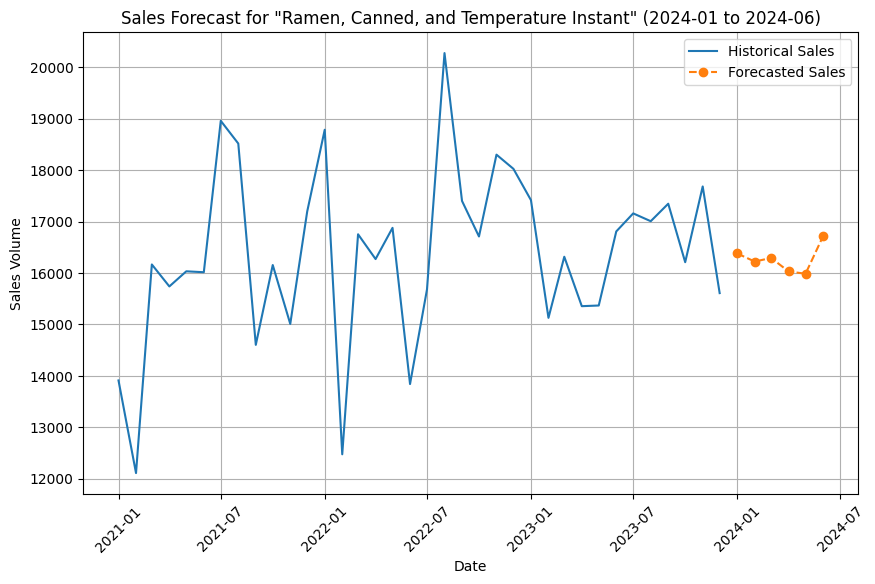

,Predicted Sales
2024-01-01,16380.523304
2024-02-01,16222.320706
2024-03-01,16292.761724
2024-04-01,16030.564985
2024-05-01,15985.104741
2024-06-01,16715.284933


In [ ]:
#SARIMA

# Use auto_arima to find the best (p, d, q) parameters with seasonality
auto_model = auto_arima(sales_ts, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model
auto_model_fit = auto_model.fit(sales_ts)

# Forecast sales for the next 6 months (January to June 2024)
forecast_auto = auto_model_fit.predict(n_periods=6)

# Create a new dataframe for the forecasted values
forecast_index = pd.date_range(start='2024-01-01', periods=6, freq='MS')
forecast_auto_df = pd.DataFrame(forecast_auto, index=forecast_index, columns=['Predicted Sales'])

# Plot the historical data and forecast
plt.figure(figsize=(10,6))
plt.plot(sales_ts.index, sales_ts, label='Historical Sales')
plt.plot(forecast_auto_df.index, forecast_auto_df['Predicted Sales'], label='Forecasted Sales', linestyle='--', marker='o')
plt.title('Sales Forecast for "Ramen, Canned, and Temperature Instant" (2024-01 to 2024-06)')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the forecasted sales
forecast_auto_df


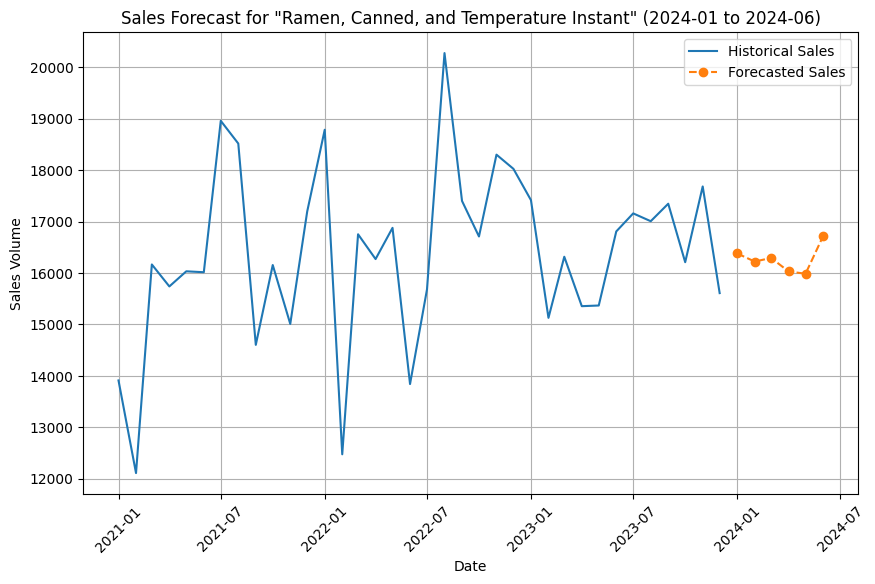

,Predicted Sales
2024-01-01,16380.523304
2024-02-01,16222.320706
2024-03-01,16292.761724
2024-04-01,16030.564985
2024-05-01,15985.104741
2024-06-01,16715.284933


In [ ]:
# Plot the historical data and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(sales_ts.index, sales_ts, label='Historical Sales')
plt.plot(forecast_auto_df.index, forecast_auto_df['Predicted Sales'], label='Forecasted Sales', linestyle='--', marker='o')
plt.title('Sales Forecast for "Ramen, Canned, and Temperature Instant" (2024-01 to 2024-06)')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig('SARIMA_sales_quantity_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the forecasted sales
forecast_auto_df


LSTM

In [ ]:
!pip install tensorflow --upgrade


Epoch 1/20


<ipython-input-33-25a4281f0f73>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['YearMonth'] = filtered_data['판매일'].dt.to_period('M')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2580
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0817
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0671
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0554
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0633
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0616
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0536
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0608
Epoch 13/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0382
Epoch 14/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0719
Epoch 15/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450
Epoch 16/20
19/19 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


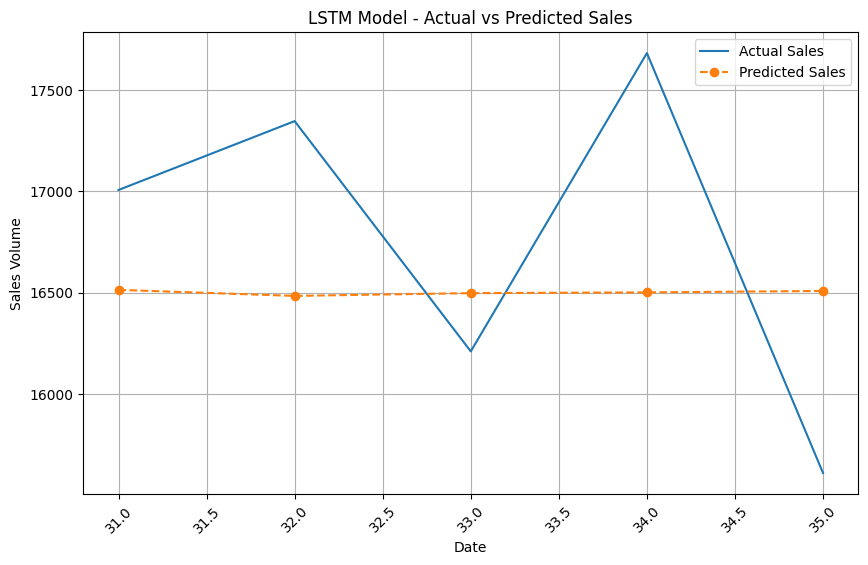

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


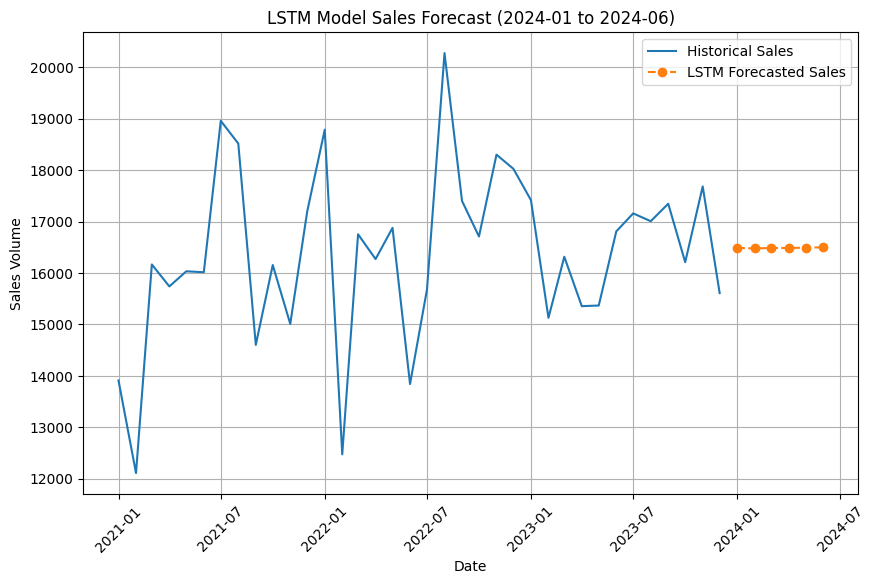

,Predicted Sales
2024-01-01,16488.869141
2024-02-01,16476.675781
2024-03-01,16487.587891
2024-04-01,16485.476562
2024-05-01,16492.701172
2024-06-01,16498.800781


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Prepare the time series data
# Ensure '판매일' is in datetime format
combined_data_many_catgories['판매일'] = pd.to_datetime(combined_data_many_catgories['판매일'])

# Filter the data for 'Ramen, Canned, and Temperature Instant' category
filtered_data = combined_data_many_catgories[combined_data_many_catgories['중분류'] == '라면,통조림,상온즉석']

# Aggregate sales by month
filtered_data['YearMonth'] = filtered_data['판매일'].dt.to_period('M')
monthly_sales = filtered_data.groupby('YearMonth')['판매수량'].sum().reset_index()

# Convert 'YearMonth' to timestamp for easier manipulation
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Prepare the data for LSTM
sales_ts = monthly_sales.set_index('YearMonth')['판매수량']

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales_ts.values.reshape(-1, 1))

# Create sequences for LSTM (using previous 12 months to predict the next month)
def create_sequences(data, time_step=12):
    X, y = [], []
    for i in range(len(data)-time_step):
        X.append(data[i:i+time_step, 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_sequences(sales_scaled, time_step)

# Reshape the data to be [samples, time steps, features] for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets (train: 80%, test: 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=20)

# Predict on the test data
predicted_sales = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
predicted_sales = scaler.inverse_transform(predicted_sales)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the test predictions vs actual values
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index[-len(predicted_sales):], y_test, label='Actual Sales')
plt.plot(monthly_sales.index[-len(predicted_sales):], predicted_sales, label='Predicted Sales', linestyle='--', marker='o')
plt.title('LSTM Model - Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
# Forecast the next 6 months using the last available time step data
last_sequence = sales_scaled[-time_step:]
last_sequence = last_sequence.reshape(1, time_step, 1)
future_sales = []

for _ in range(6):  # Predict next 6 months
    next_sales = model.predict(last_sequence)
    future_sales.append(next_sales[0, 0])  # Append the predicted value
    # Reshape next_sales to match the dimensions of last_sequence
    next_sales_reshaped = next_sales.reshape(1, 1, 1)  # Reshape next_sales to 3D
    last_sequence = np.append(last_sequence[:, 1:, :], next_sales_reshaped, axis=1)

# Inverse transform the forecasted sales to the original scale
future_sales = scaler.inverse_transform(np.array(future_sales).reshape(-1, 1))

# Create future dates for the forecast
future_dates = pd.date_range(start='2024-01-01', periods=6, freq='MS')

# Create a dataframe for forecasted sales
forecast_lstm_df = pd.DataFrame(future_sales, index=future_dates, columns=['Predicted Sales'])

# Plot the forecasted values for the next 6 months
plt.figure(figsize=(10,6))
plt.plot(sales_ts.index, sales_ts, label='Historical Sales')
plt.plot(forecast_lstm_df.index, forecast_lstm_df['Predicted Sales'], label='LSTM Forecasted Sales', linestyle='--', marker='o')
plt.title('LSTM Model Sales Forecast (2024-01 to 2024-06)')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.savefig('LSTM_sales_quantity_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the LSTM forecasted sales
forecast_lstm_df



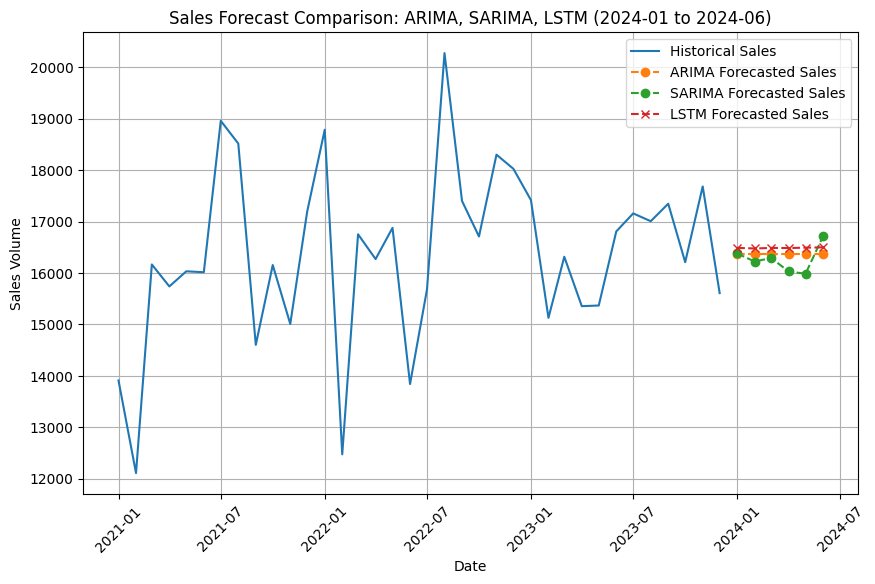

In [ ]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.figure(figsize=(10,6))

# Plot historical sales
plt.plot(sales_ts.index, sales_ts, label='Historical Sales')

# Plot ARIMA forecast
plt.plot(forecast_auto_df_arima.index, forecast_auto_df_arima['Predicted Sales'], label='ARIMA Forecasted Sales', linestyle='--', marker='o')

# Plot SARIMA forecast
plt.plot(forecast_auto_df.index, forecast_auto_df['Predicted Sales'], label='SARIMA Forecasted Sales', linestyle='--', marker='o')

# Plot LSTM forecast
plt.plot(forecast_lstm_df.index, forecast_lstm_df['Predicted Sales'], label='LSTM Forecasted Sales', linestyle='--', marker='x')

# Add title and labels
plt.title('Sales Forecast Comparison: ARIMA, SARIMA, LSTM (2024-01 to 2024-06)')
plt.xlabel('Date')
plt.ylabel('Sales Volume')

# Add grid and legend
plt.legend()
plt.grid(True)

# Customize x-axis ticks
plt.xticks(rotation=45)

# Save the plot
plt.savefig('ARIMA_SARIMA_LSTM.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split historical data into train and test sets (e.g., train up to 2022, test on 2023 data)
train_size = int(len(sales_ts) * 0.8)
train_data = sales_ts[:train_size]  # Training data
test_data = sales_ts[train_size:]   # Validation/test data

# Train ARIMA model on train_data
arima_model = SARIMAX(train_data, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Forecast on the test set
arima_forecast = arima_model_fit.forecast(steps=len(test_data))

# Train SARIMA model on train_data
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

# Forecast on the test set
sarima_forecast = sarima_model_fit.forecast(steps=len(test_data))

# For LSTM: Prepare the data and train the model on train_data
# (reuse the LSTM code you already have for training)
# Ensure that the LSTM model is trained only on `train_data`

# After training LSTM on train_data, forecast on the test set (validation set)

# Now calculate performance metrics for the test period (validation set)

# ARIMA Metrics
mae_arima = mean_absolute_error(test_data, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_data, arima_forecast))

# SARIMA Metrics
mae_sarima = mean_absolute_error(test_data, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test_data, sarima_forecast))

# LSTM Metrics (assuming you have `lstm_forecast` from the LSTM model)
# mae_lstm = mean_absolute_error(test_data, lstm_forecast)
# rmse_lstm = np.sqrt(mean_squared_error(test_data, lstm_forecast))

# Print the results
print("ARIMA Performance on Validation Set:")
print(f"MAE: {mae_arima}, RMSE: {rmse_arima}")

print("\nSARIMA Performance on Validation Set:")
print(f"MAE: {mae_sarima}, RMSE: {rmse_sarima}")

# Uncomment when you have LSTM forecast
# print("\nLSTM Performance on Validation Set:")
# print(f"MAE: {mae_lstm}, RMSE: {rmse_lstm}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA Performance on Validation Set:
MAE: 1123.5188250866183, RMSE: 1321.569136403541

SARIMA Performance on Validation Set:
MAE: 1241.39898489592, RMSE: 1516.7114713385174


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


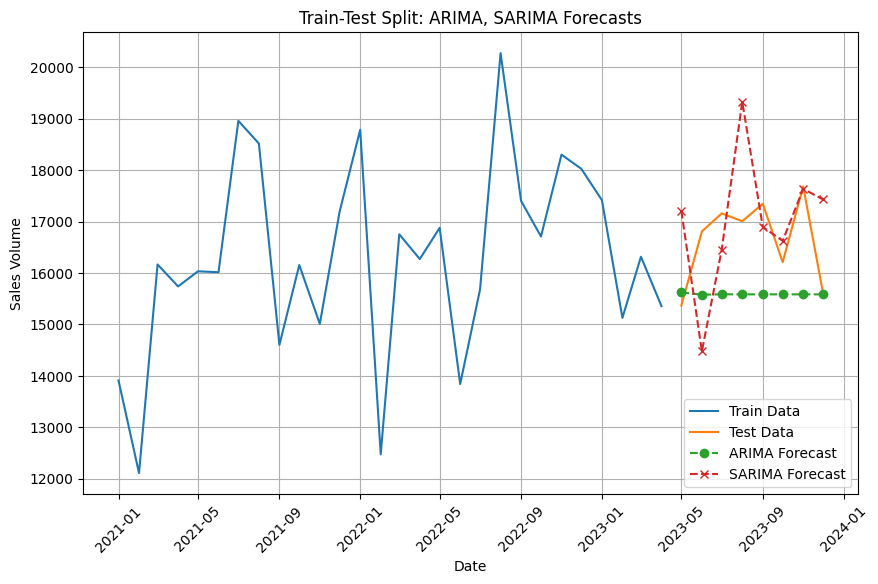

In [ ]:
# Plot the train and test data
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')

# Plot ARIMA and SARIMA forecasts on test data
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', linestyle='--', marker='o')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', linestyle='--', marker='x')

# Add title and labels
plt.title('Train-Test Split: ARIMA, SARIMA Forecasts')
plt.xlabel('Date')
plt.ylabel('Sales Volume')

# Add legend
plt.legend()
plt.grid(True)

# Customize x-axis ticks
plt.xticks(rotation=45)

# Save the plot
plt.savefig('ARIMA_SARIMA_train_test_split.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


2022-2023 데이터를 통해 비교